<a href="https://colab.research.google.com/github/Eminent01/AMMI_Research/blob/main/AMMI_Research2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import sys
# import os
# # import config
# import pandas as pd
# import numpy as np
# # from config import config
# import matplotlib.pylab as plt

# import yfinance as yf
# from pandas_datareader import data as pdr
# import pkg_resources
# %matplotlib inline

In [2]:
!pip install yfinance
!pip install stockstats
!pip install gym
!pip install stable-baselines3[extra]
!pip install tensorflow
# !pip install git+https://github.com/quantopian/pyfolio
!pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 170 kB 30.4 MB/s 
     |████████████████████████████████| 1.5 MB 43.0 MB/s 
     |████████████████████████████████| 237 kB 57.2 MB/s 
     |████████████████████████████████| 1.6 MB 52.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached libtorrent-2

### Download data from Yfinance API

In [3]:
!pip install yfinance
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=2276b9b01afda4d17e6cf6a84275af4d9d9269dfd5e17952221b25fdff72c110
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


In [4]:
ticker_list = ['WBA', 'TRV', 'MMM', 'RTX', 'DD', 'KO', 'V', 'XOM', 'CAT', 'PG',
       'AXP', 'WMT', 'MSFT', 'VZ', 'JPM', 'UNH', 'DIS', 'HD', 'AAPL', 'CVX',
       'JNJ', 'CSCO', 'PFE', 'IBM', 'MRK', 'INTC', 'MCD', 'BA', 'NKE', 'GS']

In [5]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

df = yf.download(ticker_list, 
                      start='2010-01-01', 
                      end='2021-06-12', 
                      progress=False,
)
print(df.head())

           Adj Close                                                         \
                AAPL        AXP         BA        CAT       CSCO        CVX   
Date                                                                          
2010-01-04  6.515212  33.792690  43.777546  41.353184  17.533104  47.266052   
2010-01-05  6.526478  33.718380  45.211353  41.847584  17.454988  47.600853   
2010-01-06  6.422664  34.263424  46.582802  41.974731  17.341373  47.606831   
2010-01-07  6.410791  34.819118  48.468552  42.144245  17.419491  47.427479   
2010-01-08  6.453412  34.794235  48.001022  42.617451  17.511803  47.511189   

                                                         ...    Volume  \
                   DD        DIS          GS         HD  ...       PFE   
Date                                                     ...             
2010-01-04  29.206366  27.933916  140.864349  21.122953  ...  54898644   
2010-01-05  30.507524  27.864239  143.354767  21.277672  ...  45714931 

In [6]:
data = df.copy()

In [7]:
data = data.stack().reset_index()
data.columns.names = [None]
data = data.drop(['Close'], axis=1)

In [8]:
data.head()

,Date,level_1,Adj Close,High,Low,Open,Volume
0,2010-01-04,AAPL,6.515212,7.660714,7.585000,7.622500,493729600
1,2010-01-04,AXP,33.792690,41.099998,40.389999,40.810001,6894300
2,2010-01-04,BA,43.777546,56.389999,54.799999,55.720001,6186700
3,2010-01-04,CAT,41.353184,59.189999,57.509998,57.650002,7325600
4,2010-01-04,CSCO,17.533104,24.840000,24.010000,24.110001,59853700


In [9]:
data.columns = ['date','stock_name','close','high','low','open','volume']

In [10]:
data.head()

,date,stock_name,close,high,low,open,volume
0,2010-01-04,AAPL,6.515212,7.660714,7.585000,7.622500,493729600
1,2010-01-04,AXP,33.792690,41.099998,40.389999,40.810001,6894300
2,2010-01-04,BA,43.777546,56.389999,54.799999,55.720001,6186700
3,2010-01-04,CAT,41.353184,59.189999,57.509998,57.650002,7325600
4,2010-01-04,CSCO,17.533104,24.840000,24.010000,24.110001,59853700


In [11]:
# check for missing values
data.isna().sum()

date          0
stock_name    0
close         0
high          0
low           0
open          0
volume        0
dtype: int64

In [12]:
# check if all stock have the same number of data points

no_datasets = []
for i in ticker_list:
    no_data_points = data[data['stock_name']==i].shape[0]
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)

In [13]:
data_points_df.head()

,0,1
0,WBA,2880
1,TRV,2880
2,MMM,2880
3,RTX,2880
4,DD,2880


In [14]:
##Save the data to CSV
data.to_csv('datasets.csv', index=False)

#### Create close price data



In [15]:
# read the data from the saved csv file
df_prices = pd.read_csv('/content/datasets.csv')

In [16]:
# Reset the Index to tic and date
df_prices = df_prices.reset_index().set_index(['stock_name', 'date']).sort_index()

# Get the list of all the tickers
tic_list = list(set([i for i,j in df_prices.index]))

# Create an empty data frame for the close prices
df_close = pd.DataFrame()

In [17]:
# Reset the Index to tic and date
df_prices = df_prices.reset_index().set_index(['stock_name', 'date']).sort_index()

# Get all the Close Prices
df_close = pd.DataFrame()

for ticker in tic_list:
    series = df_prices.xs(ticker).close
    df_close[ticker] = series
    
df_close = df_close.reset_index()

In [18]:
df_close.head()

,date,CAT,IBM,TRV,GS,CVX,DD,XOM,V,VZ,...,NKE,WBA,JPM,JNJ,MMM,INTC,WMT,MRK,UNH,DIS
0,2010-01-04,41.353184,81.314713,36.311024,140.864349,47.266052,29.206366,41.998306,20.094740,16.828814,...,13.989439,26.326164,30.742659,44.278515,57.456139,14.020265,40.329685,22.735378,25.983177,27.933916
1,2010-01-05,41.847584,80.332481,35.450809,143.354767,47.600853,30.507524,42.162292,19.864475,16.859156,...,14.045099,26.114424,31.338146,43.765099,57.096241,14.013546,39.928104,22.827526,25.941969,27.864239
2,2010-01-06,41.974731,79.810608,34.947811,141.824677,47.606831,31.048012,42.526707,19.597736,16.374390,...,13.959472,25.916803,31.510326,44.121063,57.905968,13.966543,39.838844,23.134676,26.197437,27.716164
3,2010-01-07,42.144245,79.534340,35.450809,144.599976,47.427479,31.068035,42.393093,19.780119,16.276922,...,14.096476,26.072069,32.134514,43.806160,57.947483,13.832250,39.861160,23.171532,27.202810,27.724876
4,2010-01-08,42.617451,80.332481,35.399784,141.865402,47.511189,31.178133,42.223026,19.834835,16.287180,...,14.068648,26.107363,32.055592,43.956768,58.355808,13.986690,39.660370,23.159237,26.947355,27.768427


In [19]:
# Save the Close Price datase
df_close.to_csv('close_prices.csv', index=False)

In [20]:
# ! pip install pandas-ta

In [21]:
# import matplotlib.pyplot as plt

In [22]:
# plt.plot(df)
# plt.xlabel("Date")
# plt.ylabel("Stock Price")

## Stock Selection using the stocks with least reconstruction error stock usind Auto encoder network

In [68]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense, Activation
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
from keras import regularizers, optimizers
from sklearn import preprocessing
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [24]:
close_price =pd.read_csv("/content/close_prices.csv")

In [25]:
df2 = close_price.copy()

In [26]:
df2 = df2.reset_index(drop=True).set_index(['date'])

In [27]:
df2.head()

,CAT,IBM,TRV,GS,CVX,DD,XOM,V,VZ,BA,...,NKE,WBA,JPM,JNJ,MMM,INTC,WMT,MRK,UNH,DIS
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,41.353184,81.314713,36.311024,140.864349,47.266052,29.206366,41.998306,20.094740,16.828814,43.777546,...,13.989439,26.326164,30.742659,44.278515,57.456139,14.020265,40.329685,22.735378,25.983177,27.933916
2010-01-05,41.847584,80.332481,35.450809,143.354767,47.600853,30.507524,42.162292,19.864475,16.859156,45.211353,...,14.045099,26.114424,31.338146,43.765099,57.096241,14.013546,39.928104,22.827526,25.941969,27.864239
2010-01-06,41.974731,79.810608,34.947811,141.824677,47.606831,31.048012,42.526707,19.597736,16.374390,46.582802,...,13.959472,25.916803,31.510326,44.121063,57.905968,13.966543,39.838844,23.134676,26.197437,27.716164
2010-01-07,42.144245,79.534340,35.450809,144.599976,47.427479,31.068035,42.393093,19.780119,16.276922,48.468552,...,14.096476,26.072069,32.134514,43.806160,57.947483,13.832250,39.861160,23.171532,27.202810,27.724876
2010-01-08,42.617451,80.332481,35.399784,141.865402,47.511189,31.178133,42.223026,19.834835,16.287180,48.001022,...,14.068648,26.107363,32.055592,43.956768,58.355808,13.986690,39.660370,23.159237,26.947355,27.768427


In [28]:
def defineAutoencoder(num_stock, encoding_dim = 5, verbose=0):
    
    """
    Function for fitting an Autoencoder
    """

    # connect all layers
    input = Input(shape=(num_stock,))

    encoded = Dense(encoding_dim, kernel_regularizer=regularizers.l2(0.00001),name ='Encoder_Input')(input)

    decoded = Dense(num_stock, kernel_regularizer=regularizers.l2(0.00001), name ='Decoder_Input')(encoded)
    decoded = Activation("linear", name='Decoder_Activation_function')(decoded)

    # construct and compile AE model
    autoencoder = Model(inputs=input, outputs=decoded)
    adam = optimizers.Adam(lr=0.0005)
    autoencoder.compile(optimizer=adam, loss='mean_squared_error')
    if verbose!= 0:
        autoencoder.summary()

    return autoencoder

In [29]:
def getReconstructionErrorsDF(df_pct_change, reconstructed_data):
    
    """
    Function for calculating the reconstruction Errors
    """
    array = []
    stocks_ranked = []
    num_columns = reconstructed_data.shape[1]
    for i in range(0, num_columns):
        diff = np.linalg.norm((df_pct_change.iloc[:, i] - reconstructed_data[:, i]))  # 2 norm difference
        array.append(float(diff))

    ranking = np.array(array).argsort()
    r = 1
    for stock_index in ranking:
        stocks_ranked.append([ r
                              ,stock_index
                              ,df_pct_change.iloc[:, stock_index].name
                              ,array[stock_index]
                              ])
        r = r + 1

    columns = ['ranking','stock_index', 'stock_name' ,'recreation_error']
    df = pd.DataFrame(stocks_ranked, columns=columns)
    df = df.set_index('stock_name')
    return df

In [30]:
df_pct_change = df2.pct_change(1).astype(float)
df_pct_change = df_pct_change.replace([np.inf, -np.inf], np.nan)
df_pct_change = df_pct_change.fillna(method='ffill')

# the percentage change function will make the first two rows equal to nan
df_pct_change = df_pct_change.tail(len(df_pct_change) - 2)

In [31]:
# remove columns where there is no change over a longer time period
df_pct_change = df_pct_change[df_pct_change.columns[((df_pct_change == 0).mean() <= 0.05)]]

In [32]:
df_pct_change.head()

,CAT,IBM,TRV,GS,CVX,DD,XOM,V,VZ,BA,...,NKE,WBA,JPM,JNJ,MMM,INTC,WMT,MRK,UNH,DIS
date,,,,,,,,,,,,,,,,,,,,,
2010-01-06,0.003038,-0.006496,-0.014189,-0.010673,0.000126,0.017717,0.008643,-0.013428,-0.028754,0.030334,...,-0.006097,-0.007567,0.005494,0.008134,0.014182,-0.003354,-0.002236,0.013455,0.009848,-0.005314
2010-01-07,0.004038,-0.003462,0.014393,0.019569,-0.003767,0.000645,-0.003142,0.009306,-0.005952,0.040482,...,0.009814,0.005991,0.019809,-0.007137,0.000717,-0.009615,0.000560,0.001593,0.038377,0.000314
2010-01-08,0.011228,0.010035,-0.001439,-0.018911,0.001765,0.003544,-0.004012,0.002766,0.000630,-0.009646,...,-0.001974,0.001354,-0.002456,0.003438,0.007046,0.011165,-0.005037,-0.000531,-0.009391,0.001571
2010-01-11,0.062811,-0.010470,-0.000412,-0.015777,0.017742,-0.012520,0.011220,-0.002874,0.004095,-0.011851,...,-0.012325,0.001622,-0.003357,0.000156,-0.004032,0.005761,0.016501,0.003979,0.006728,-0.016311
2010-01-12,-0.029471,0.007955,0.006386,-0.021800,-0.005811,0.003251,-0.004979,-0.004726,0.000941,-0.007229,...,-0.001386,-0.008367,-0.023355,0.005294,0.000833,-0.016229,0.009592,-0.007926,-0.026428,-0.017219


In [33]:
# define the input parameters
hidden_layers = 5
batch_size = 500
epochs = 100
stock_selection_number = 20
num_stock = df_pct_change.shape[1]
verbose = 1

In [34]:
# Normalize the data
df_scaler = preprocessing.MinMaxScaler()
df_pct_change_normalised = df_scaler.fit_transform(df_pct_change)

In [35]:
# define autoencoder
print('-' * 25 + 'Define autoencoder model')
num_stock = len(df_pct_change.columns)
autoencoder = defineAutoencoder(num_stock=num_stock, encoding_dim=hidden_layers, verbose=verbose)
#plot_model(autoencoder, to_file='img/model_autoencoder_1.png', show_shapes=True,
#           show_layer_names=True)

-------------------------Define autoencoder model
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 Encoder_Input (Dense)       (None, 5)                 155       
                                                                 
 Decoder_Input (Dense)       (None, 30)                180       
                                                                 
 Decoder_Activation_function  (None, 30)               0         
  (Activation)                                                   
                                                                 
Total params: 335
Trainable params: 335
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [36]:
# train autoencoder
print('-' * 25 + 'Train autoencoder model')
autoencoder.fit(df_pct_change_normalised, df_pct_change_normalised, shuffle=False, epochs=epochs,
                batch_size=batch_size,
                verbose=verbose)

-------------------------Train autoencoder model
Epoch 1/100
6/6 [==============================] - 1s 4ms/step - loss: 0.5453
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5017
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4623
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4268
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.3949
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3661
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3400
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3163
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2947
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2749
Epoch 11/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2566
Epoch 12/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2398
Epoch 13/100

In [37]:
# predict autoencoder
print('-' * 25 + 'Predict autoencoder model')
reconstruct = autoencoder.predict(df_pct_change_normalised)

-------------------------Predict autoencoder model
90/90 [==============================] - 0s 3ms/step


In [38]:

# Inverse transform dataset with MinMax Scaler
print('-' * 25 + 'Inverse transform dataset with MinMax Scaler')
reconstruct_real = df_scaler.inverse_transform(reconstruct)
df_reconstruct_real = pd.DataFrame(data=reconstruct_real, columns=df_pct_change.columns)

-------------------------Inverse transform dataset with MinMax Scaler


In [39]:
print('-' * 25 + 'Calculate L2 norm as reconstruction loss metric')
df_recreation_error = getReconstructionErrorsDF(df_pct_change=df_pct_change,
                                                reconstructed_data=reconstruct_real)

-------------------------Calculate L2 norm as reconstruction loss metric


In [40]:
df_recreation_error

,ranking,stock_index,recreation_error
stock_name,,,
PFE,1,10,0.497211
KO,2,18,0.508901
JNJ,3,23,0.516890
RTX,4,13,0.525287
PG,5,16,0.541190
MMM,6,24,0.557771
VZ,7,8,0.573013
IBM,8,1,0.597519
XOM,9,6,0.602672


In [41]:
filtered_stocks = df_recreation_error.head(stock_selection_number).index

In [42]:
filtered_stocks

Index(['PFE', 'KO', 'JNJ', 'RTX', 'PG', 'MMM', 'VZ', 'IBM', 'XOM', 'WMT',
       'MRK', 'NKE', 'V', 'MCD', 'CVX', 'AAPL', 'AXP', 'HD', 'GS', 'DD'],
      dtype='object', name='stock_name')

In [43]:
# store the list of selected stocks
%store filtered_stocks

Stored 'filtered_stocks' (Index)


## Visualizing stocks with the least recreation error

In [58]:
df3 = close_price[['date','WMT','PG','JNJ','VZ', 'MRK','KO','PFE',	'MCD','TRV','XOM']]

In [59]:
df3.head()

,date,WMT,PG,JNJ,VZ,MRK,KO,PFE,MCD,TRV,XOM
0,2010-01-04,40.329685,41.439651,44.278515,16.828814,22.735378,19.081615,11.128055,43.471886,36.311024,41.998306
1,2010-01-05,39.928104,41.453213,43.765099,16.859156,22.827526,18.850788,10.969332,43.139515,35.450809,42.162292
2,2010-01-06,39.838844,41.256577,44.121063,16.374390,23.134676,18.844097,10.934056,42.550926,34.947811,42.526707
3,2010-01-07,39.861160,41.032833,43.806160,16.276922,23.171532,18.797266,10.892912,42.862522,35.450809,42.393093
4,2010-01-08,39.660370,40.978607,43.956768,16.287180,23.159237,18.449356,10.981088,42.820988,35.399784,42.223026


In [61]:
# Sort the stock data by date
df3 = df3.sort_values(by = ['date'])
df3

,date,WMT,PG,JNJ,VZ,MRK,KO,PFE,MCD,TRV,XOM
0,2010-01-04,40.329685,41.439651,44.278515,16.828814,22.735378,19.081615,11.128055,43.471886,36.311024,41.998306
1,2010-01-05,39.928104,41.453213,43.765099,16.859156,22.827526,18.850788,10.969332,43.139515,35.450809,42.162292
2,2010-01-06,39.838844,41.256577,44.121063,16.374390,23.134676,18.844097,10.934056,42.550926,34.947811,42.526707
3,2010-01-07,39.861160,41.032833,43.806160,16.276922,23.171532,18.797266,10.892912,42.862522,35.450809,42.393093
4,2010-01-08,39.660370,40.978607,43.956768,16.287180,23.159237,18.449356,10.981088,42.820988,35.399784,42.223026
...,...,...,...,...,...,...,...,...,...,...,...
2875,2021-06-07,137.656555,131.468369,158.632080,52.999485,69.113960,53.205360,37.098976,224.136429,151.864853,57.077938
2876,2021-06-08,136.611206,129.945724,157.236664,52.953159,68.734207,52.835087,36.965759,225.055450,151.653061,58.087673
2877,2021-06-09,135.878479,129.897537,159.353821,52.860504,70.291176,52.673687,37.879204,223.923584,149.794434,58.573841
2878,2021-06-10,136.660034,130.861267,160.787704,53.129204,72.284843,53.081932,38.707005,226.941864,149.097443,58.667332


In [62]:
def show_plot(df, fig_title):
  df.plot(x = 'date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()

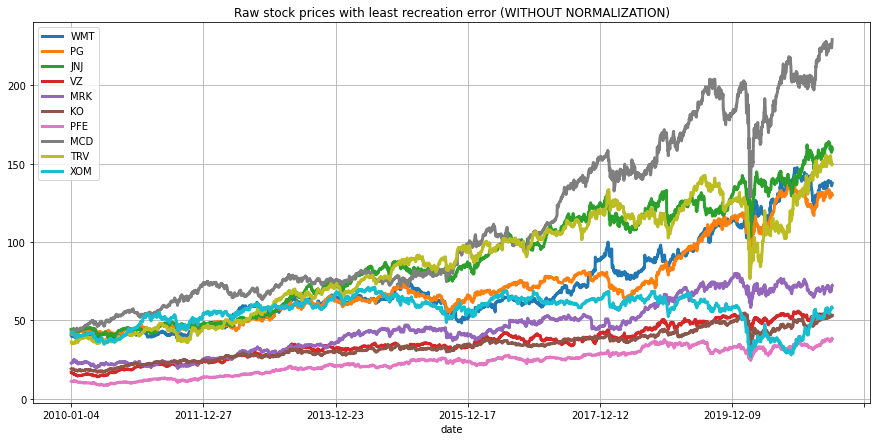

In [65]:
# Plot the data
show_plot(df3, 'Raw stock prices with least recreation error (WITHOUT NORMALIZATION)')

In [71]:
def interactive_plot(df, title):
  fig = px.line(title = title)
  
  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    fig.add_scatter(x = df3['date'], y = df3[i], name = i) # add a new Scatter trace

  fig.show()

In [72]:
# Plot interactive chart
interactive_plot(df3, 'Prices')

### Feature Engineering and Data Preprocessing

In [ ]:
!pip install ta

In [ ]:
 # Install the unstable development version in Jupyter notebook:
# !pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

In [ ]:
# !pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

In [ ]:
# !git clone https://github.com/AI4Finance-Foundation/FinRL.git

In [ ]:
import pandas as pd
import numpy as np
import ta
from ta import add_all_ta_features
from ta.utils import dropna
# from finrl.preprocessing.preprocessors import FeatureEngineer
# from finrl.preprocessing.data import data_split


In [ ]:
list_of_stocks = filtered_stocks
print(list_of_stocks)

In [ ]:
data = data[data['stock_name'].isin(list_of_stocks)]

In [ ]:
data.stock_name.unique()

In [ ]:
def add_features(data, feature_list, short_names):
    
    # list of column names to filter the features
    data_col_names = list(data.columns)
    filter_names = data_col_names + feature_list
    col_rename = data_col_names +  short_names
    
    # Add technical indicators using the ta Library
    data = add_all_ta_features(data, open="open", high="high", 
    low="low", close="close", volume="volume") 
    
    # Filter the Indicators with the required features
    data = data[filter_names]
    data.columns = col_rename # rename the columns to use shortened indicator names
    data = data.dropna()
    
    return data

In [ ]:
# List of Features to add
feature_list= ['volatility_atr','volatility_bbw','volume_obv','volume_cmf',
               'trend_macd', 'trend_adx', 'trend_sma_fast', 
               'trend_ema_fast', 'trend_cci', 'momentum_rsi']

# Short names of the features
short_names = ['atr', 'bbw','obv','cmf','macd', 'adx', 'sma', 'ema', 'cci', 'rsi']


In [ ]:
# Add Indicators to our dataset
data_with_features = data.copy()

data_with_features = add_features(data_with_features, feature_list, short_names)

In [ ]:
data_with_features.head()

In [ ]:
feature_list = list(data_with_features.columns)[7:]

In [ ]:
print(feature_list)

In [ ]:
def add_cov_matrix(df):
    """
    Function to add Coveriance Matrices as part of the defined states
    """
    # Sort the data and index by date and tic
    df=df.sort_values(['date','stock_name'],ignore_index=True) 
    df.index = df.date.factorize()[0]
    
    cov_list = [] # create empty list for storing coveriance matrices at each time step
    
    # look back for constructing the coveriance matrix is one year
    lookback=252
    for i in range(lookback,len(df.index.unique())):
        data_lookback = df.loc[i-lookback:i,:]
        price_lookback=data_lookback.pivot_table(index = 'date',columns = 'stock_name', values = 'close')
        return_lookback = price_lookback.pct_change().dropna()
        covs = return_lookback.cov().values 
        covs = covs#/covs.max()
        cov_list.append(covs)
        
    df_cov = pd.DataFrame({'date':df.date.unique()[lookback:],'cov_list':cov_list})
    df = df.merge(df_cov, on='date')
    df = df.sort_values(['date','stock_name']).reset_index(drop=True)
    
    return df


In [ ]:
# Add Covariance Matrices to our dataset
data_with_features_covs = data_with_features.copy()
data_with_features_covs = add_cov_matrix(data_with_features_covs)

In [ ]:
data_with_features_covs.head()

## Store the Dataframe

In [ ]:
df = data_with_features_covs

In [ ]:
%store df